In [1]:

# Import pacakages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
import pycountry
import re
import ipywidgets as widgets
import cufflinks as cf
import geopandas as gpd

from ipywidgets import interact, interactive, fixed, interact_manual
from mpl_toolkits.axes_grid1 import make_axes_locatable

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA


# Setting global enviorment parameters below for easy viewing
pd.set_option('display.max_columns', None) 
plt.rcParams['figure.figsize'] = [15, 9] 

In [2]:
! pip install geopandas


In [3]:
# Reading CSV files and removing Unnecessary columns
pop_data = pd.read_csv('../Datasets/Population Data 1960-2050.csv', low_memory=False)
pop_data = pop_data.replace('..', np.nan)
pop_data = pop_data.iloc[: , 1:] # Removing unnecessary column
pop_data.head(10)

,Continent_Name,Continent_Code,Country_Number,Country_Name,Country_Code,Series_Name,Series_Code,[1960],[1961],[1962],[1963],[1964],[1965],[1966],[1967],[1968],[1969],[1970],[1971],[1972],[1973],[1974],[1975],[1976],[1977],[1978],[1979],[1980],[1981],[1982],[1983],[1984],[1985],[1986],[1987],[1988],[1989],[1990],[1991],[1992],[1993],[1994],[1995],[1996],[1997],[1998],[1999],[2000],[2001],[2002],[2003],[2004],[2005],[2006],[2007],[2008],[2009],[2010],[2011],[2012],[2013],[2014],[2015],[2016],[2017],[2018],[2019],[2020],[2021],[2022],[2023],[2024],[2025],[2026],[2027],[2028],[2029],[2030],[2031],[2032],[2033],[2034],[2035],[2036],[2037],[2038],[2039],[2040],[2041],[2042],[2043],[2044],[2045],[2046],[2047],[2048],[2049],[2050]
0,Asia,AS,4.0,Afghanistan,AFG,Age dependency ratio (% of working-age populat...,SP.POP.DPND,81.617265593364,82.6886781269233,83.2893702677964,83.6040745667416,83.8538402296331,84.1305132205961,85.337606639107,86.3875817780626,87.2881796110479,88.004333820123,88.5257734411341,89.7775513950377,90.711207917884,91.3786718889649,91.8030471642632,91.9457639589236,92.9888574822643,93.858398071556,94.5105001444847,94.8159236718955,94.6074368846258,95.7623085653002,96.7238143522287,97.5152373392122,98.2848562519578,99.2641805972282,100.037992327902,100.318450831989,100.419936268638,100.852511182472,102.186695822177,101.855829678157,101.572891363737,101.497709604882,101.361665767309,100.751043096938,101.779455410549,102.821757539625,103.650785887861,104.275818919765,104.856398128094,104.476104431144,103.671182514941,102.663237607573,101.562370593157,100.349127298896,100.970943099336,101.600182463114,102.078658552986,102.249014354329,102.04582265028,100.224460810072,97.9259472109872,95.3387363003889,92.6491430408227,89.9540923341871,87.9417880743028,86.0007546392816,84.0776554602003,82.1097716001822,80.0882594983951,78.2140686091963,76.2873365602917,74.3682121084769,72.5347069038439,70.818707027286,69.2728455912696,67.811842050991,66.4260053997555,65.0929735927391,63.7996513768842,62.5877916751458,61.4162866626515,60.2818752139422,59.182682333386,58.1177761443717,57.1344740085998,56.1750226260573,55.244749483167,54.3515082631579,53.4987319337544,52.721641363705,51.9732864237122,51.2542813990082,50.5649528551787,49.905272496857,49.3091701493759,48.7358507892608,48.1851513162138,47.6569146420521,47.1525182056463
1,Asia,AS,4.0,Afghanistan,AFG,"Age dependency ratio, old",SP.POP.DPND.OL,5.08221355458813,5.13013875077877,5.1396410434319,5.11552596472367,5.06374943823744,4.98789855835,5.03818379040036,5.06247965853582,5.05905695854066,5.02527774105666,4.961263617462,5.00108321936102,5.01085032694929,4.99403609195624,4.95524993193465,4.8973899858217,4.93733610490956,4.94207927072837,4.91061339949012,4.84265971718334,4.73821354846004,4.80156958470389,4.81353830554338,4.76677564527408,4.65322466391202,4.46231971723597,4.54375628731268,4.59678804497462,4.61522776578655,4.59004259086774,4.51390235010915,4.52627613429353,4.55426302653287,4.6010207759227,4.66732341775973,4.7544225968921,4.78092518838318,4.78444369236508,4.76853617345827,4.73774444597141,4.69519414570861,4.64542399494426,4.5945113217023,4.5460364961842,4.50174411893789,4.46275357219977,4.52550492386492,4.5776088271441,4.62187756017232,4.66303425585248,4.70389192215768,4.71420886190398,4.72309440866141,4.72760222695028,4.72293656494244,4.7083204539433,4.7359880220469,4.75092727211326,4.75827277828347,4.76361649281109,4.77066404234554,4.79310389873702,4.81304782154357,4.83309464391658,4.85609762171484,4.88431018163558,4.9305392330175,4.97811237221119,5.02799948484703,5.08078716026558,5.13759646227234,5.20953818576817,5.28220675539213,5.35737057386191,5.43651858362534,5.52144418811474,5.62288654428234,5.72570298266211,5.83365888912406,5.95090641922628,6.08042828599966,6.22910451801117,6.38374301415072,6.54627153153927,6.71856043377268,6.90243289671151,7.10386591421077,7.31255821375793,7.5283209975396,7.74944602991995,7.97648707408324
2,Asia,AS,4.0,Afghanistan,AFG,"Age d

In [4]:
# Types of columns in the dataset
pop_data.dtypes

# All the data in the columns are of the type object thus to do any computation on the data we need to convert the data into float.
# As most of the data is of float type.

Continent_Name     object
Continent_Code     object
Country_Number    float64
Country_Name       object
Country_Code       object
                   ...   
[2046]             object
[2047]             object
[2048]             object
[2049]             object
[2050]             object
Length: 98, dtype: object

In [5]:
# Creating a dataset of the data where the series name is net Migration as the major focus of this section 
# is on the net migration section
netMigration = pop_data[pop_data.Series_Name == "Net migration"]

In [6]:
netMigration = netMigration.iloc[:, :70]

In [7]:
netMigration

,Continent_Name,Continent_Code,Country_Number,Country_Name,Country_Code,Series_Name,Series_Code,[1960],[1961],[1962],[1963],[1964],[1965],[1966],[1967],[1968],[1969],[1970],[1971],[1972],[1973],[1974],[1975],[1976],[1977],[1978],[1979],[1980],[1981],[1982],[1983],[1984],[1985],[1986],[1987],[1988],[1989],[1990],[1991],[1992],[1993],[1994],[1995],[1996],[1997],[1998],[1999],[2000],[2001],[2002],[2003],[2004],[2005],[2006],[2007],[2008],[2009],[2010],[2011],[2012],[2013],[2014],[2015],[2016],[2017],[2018],[2019],[2020],[2021],[2022]
3,Asia,AS,4.0,Afghanistan,AFG,Net migration,SM.POP.NETM,NaN,NaN,-20000,NaN,NaN,NaN,NaN,-20000,NaN,NaN,NaN,NaN,-20000,NaN,NaN,NaN,NaN,-1153959,NaN,NaN,NaN,NaN,-3345095,NaN,NaN,NaN,NaN,-1525351,NaN,NaN,NaN,NaN,3076383,NaN,NaN,NaN,NaN,-867540,NaN,NaN,NaN,NaN,744193,NaN,NaN,NaN,NaN,-1046361,NaN,NaN,NaN,NaN,521769,NaN,NaN,NaN,NaN,-314602,NaN,NaN,NaN,NaN,-300000
93,Europe,EU,8.0,Albania,ALB,Net migration,SM.POP.NETM,NaN,NaN,-99,NaN,NaN,NaN,NaN,-99,NaN,NaN,NaN,NaN,-99,NaN,NaN,NaN,NaN,-99,NaN,NaN,NaN,NaN,-99,NaN,NaN,NaN,NaN,-99,NaN,NaN,NaN,NaN,-443212,NaN,NaN,NaN,NaN,-179606,NaN,NaN,NaN,NaN,-176774,NaN,NaN,NaN,NaN,-217358,NaN,NaN,NaN,NaN,-136590,NaN,NaN,NaN,NaN,-69998,NaN,NaN,NaN,NaN,-69998
183,Africa,AF,12.0,Algeria,DZA,Net migration,SM.POP.NETM,NaN,NaN,-282941,NaN,NaN,NaN,NaN,-121335,NaN,NaN,NaN,NaN,-253436,NaN,NaN,NaN,NaN,-224833,NaN,NaN,NaN,NaN,-81020,NaN,NaN,NaN,NaN,-93302,NaN,NaN,NaN,NaN,-128679,NaN,NaN,NaN,NaN,-164413,NaN,NaN,NaN,NaN,-205228,NaN,NaN,NaN,NaN,-357340,NaN,NaN,NaN,NaN,-143268,NaN,NaN,NaN,NaN,-50002,NaN,NaN,NaN,NaN,-50002
273,Oceania,OC,16.0,American Samoa,ASM,Net migration,SM.POP.NETM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
363,Europe,EU,20.0,Andorra,AND,Net migration,SM.POP.NETM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23493,NaN,NaN,NaN,Small states,SST,Net migration,SM.POP.NETM,NaN,NaN,-353511,NaN,NaN,NaN,NaN,-359138,NaN,NaN,NaN,NaN,-361987,NaN,NaN,NaN,NaN,-349694,NaN,NaN,NaN,NaN,-260709,NaN,NaN,NaN,NaN,-261803,NaN,NaN,NaN,NaN,-550317,NaN,NaN,NaN,NaN,-363504,NaN,NaN,NaN,NaN,-67522,NaN,NaN,NaN,NaN,958718,NaN,NaN,NaN,NaN,451614,NaN,NaN,NaN,NaN,319841,NaN,NaN,NaN,NaN,-11933
23583,NaN,NaN,NaN,South Asia,SAS,Net migration,SM.POP.NETM,NaN,NaN,-454118,NaN,NaN,NaN,NaN,-787125,NaN,NaN,NaN,NaN,-1235735,NaN,NaN,NaN,NaN,-776350,NaN,NaN,NaN,NaN,-2671138,NaN,NaN,NaN,NaN,-1914631,NaN,NaN,NaN,NaN,444901,NaN,NaN,NaN,NaN,-2726443,NaN,NaN,NaN,NaN,-4485954,NaN,NaN,NaN,NaN,-8781410,NaN,NaN,NaN,NaN,-7680665,NaN,NaN,NaN,NaN,-6215366,NaN,NaN,NaN,NaN,-5077216
23673,NaN,NaN,NaN,South Asia (IDA & IBRD),TSA,Net migration,SM.POP.NETM,NaN,NaN,-454118,NaN,NaN,NaN,NaN,-787125,NaN,NaN,NaN,NaN,-1235735,NaN,NaN,NaN,NaN,-776350,NaN,NaN,NaN,NaN,-2671138,NaN,NaN,NaN,NaN,-1914631,NaN,NaN,NaN,NaN,444901,NaN,NaN,NaN,NaN,-2726443,NaN,NaN,NaN,NaN,-4485954,NaN,NaN,NaN,NaN,-8781410,NaN,NaN,NaN,NaN,-7680665,NaN,NaN,NaN,NaN,-6215366,NaN,NaN,NaN,NaN,-5077216
23763,NaN,NaN,NaN,Sub-Saharan Africa (excluding high income),SSA,Net migration,SM.POP.NETM,NaN,NaN,-395927,NaN,NaN,NaN,NaN,-481732,NaN,NaN,NaN,NaN,-564638,NaN,NaN,NaN,NaN,-588305,NaN,NaN,NaN,NaN,-1506741,NaN,NaN,NaN,NaN,-1202761,NaN,NaN,NaN,NaN,-443853,NaN,NaN,NaN,NaN,-1513526,NaN,NaN,NaN,NaN,-1492688,NaN,NaN,NaN,NaN,-2297398,NaN,NaN,NaN,NaN,-3012764,NaN,NaN,NaN,NaN,-1813121,NaN,NaN,NaN

In [8]:
# Extracting data for net migration for each continent 


Afr = netMigration.loc[netMigration['Continent_Name'] == 'Africa']
Asi = netMigration.loc[netMigration['Continent_Name'] == 'Asia']
Eur = netMigration.loc[netMigration['Continent_Name'] == 'Europe']
Nor = netMigration.loc[netMigration['Continent_Name'] == 'North America']
Oce = netMigration.loc[netMigration['Continent_Name'] == 'Oceania']
Sou = netMigration.loc[netMigration['Continent_Name'] == 'South America']

In [9]:
Afr

,Continent_Name,Continent_Code,Country_Number,Country_Name,Country_Code,Series_Name,Series_Code,[1960],[1961],[1962],[1963],[1964],[1965],[1966],[1967],[1968],[1969],[1970],[1971],[1972],[1973],[1974],[1975],[1976],[1977],[1978],[1979],[1980],[1981],[1982],[1983],[1984],[1985],[1986],[1987],[1988],[1989],[1990],[1991],[1992],[1993],[1994],[1995],[1996],[1997],[1998],[1999],[2000],[2001],[2002],[2003],[2004],[2005],[2006],[2007],[2008],[2009],[2010],[2011],[2012],[2013],[2014],[2015],[2016],[2017],[2018],[2019],[2020],[2021],[2022]
183,Africa,AF,12.0,Algeria,DZA,Net migration,SM.POP.NETM,NaN,NaN,-282941,NaN,NaN,NaN,NaN,-121335,NaN,NaN,NaN,NaN,-253436,NaN,NaN,NaN,NaN,-224833,NaN,NaN,NaN,NaN,-81020,NaN,NaN,NaN,NaN,-93302,NaN,NaN,NaN,NaN,-128679,NaN,NaN,NaN,NaN,-164413,NaN,NaN,NaN,NaN,-205228,NaN,NaN,NaN,NaN,-357340,NaN,NaN,NaN,NaN,-143268,NaN,NaN,NaN,NaN,-50002,NaN,NaN,NaN,NaN,-50002
453,Africa,AF,24.0,Angola,AGO,Net migration,SM.POP.NETM,NaN,NaN,-296717,NaN,NaN,NaN,NaN,-587286,NaN,NaN,NaN,NaN,199800,NaN,NaN,NaN,NaN,199800,NaN,NaN,NaN,NaN,234148,NaN,NaN,NaN,NaN,188491,NaN,NaN,NaN,NaN,142812,NaN,NaN,NaN,NaN,199800,NaN,NaN,NaN,NaN,261100,NaN,NaN,NaN,NaN,357301,NaN,NaN,NaN,NaN,166267,NaN,NaN,NaN,NaN,32066,NaN,NaN,NaN,NaN,0
1893,Africa,AF,204.0,Benin,BEN,Net migration,SM.POP.NETM,NaN,NaN,-24295,NaN,NaN,NaN,NaN,-23742,NaN,NaN,NaN,NaN,-24845,NaN,NaN,NaN,NaN,-19393,NaN,NaN,NaN,NaN,-10848,NaN,NaN,NaN,NaN,-8723,NaN,NaN,NaN,NaN,68259,NaN,NaN,NaN,NaN,-2851,NaN,NaN,NaN,NaN,25005,NaN,NaN,NaN,NaN,-48776,NaN,NaN,NaN,NaN,-42268,NaN,NaN,NaN,NaN,-10000,NaN,NaN,NaN,NaN,-10000
2343,Africa,AF,72.0,Botswana,BWA,Net migration,SM.POP.NETM,NaN,NaN,-22436,NaN,NaN,NaN,NaN,-24198,NaN,NaN,NaN,NaN,3992,NaN,NaN,NaN,NaN,17744,NaN,NaN,NaN,NaN,5203,NaN,NaN,NaN,NaN,46821,NaN,NaN,NaN,NaN,24296,NaN,NaN,NaN,NaN,36443,NaN,NaN,NaN,NaN,26928,NaN,NaN,NaN,NaN,26928,NaN,NaN,NaN,NaN,-73138,NaN,NaN,NaN,NaN,14999,NaN,NaN,NaN,NaN,14999
2793,Africa,AF,854.0,Burkina Faso,BFA,Net migration,SM.POP.NETM,NaN,NaN,-144723,NaN,NaN,NaN,NaN,-144723,NaN,NaN,NaN,NaN,-170263,NaN,NaN,NaN,NaN,-217400,NaN,NaN,NaN,NaN,-217400,NaN,NaN,NaN,NaN,-183699,NaN,NaN,NaN,NaN,-150001,NaN,NaN,NaN,NaN,-137499,NaN,NaN,NaN,NaN,-125000,NaN,NaN,NaN,NaN,-125000,NaN,NaN,NaN,NaN,-125000,NaN,NaN,NaN,NaN,-125000,NaN,NaN,NaN,NaN,-125000
2883,Africa,AF,108.0,Burundi,BDI,Net migration,SM.POP.NETM,NaN,NaN,-84989,NaN,NaN,NaN,NaN,-57900,NaN,NaN,NaN,NaN,-266496,NaN,NaN,NaN,NaN,-150290,NaN,NaN,NaN,NaN,-139146,NaN,NaN,NaN,NaN,-180004,NaN,NaN,NaN,NaN,-320001,NaN,NaN,NaN,NaN,-455304,NaN,NaN,NaN,NaN,-24721,NaN,NaN,NaN,NaN,30004,NaN,NaN,NaN,NaN,-70001,NaN,NaN,NaN,NaN,10003,NaN,NaN,NaN,NaN,10003
2973,Africa,AF,132.0,Cabo Verde,CPV,Net migration,SM.POP.NETM,NaN,NaN,-1167,NaN,NaN,NaN,NaN,4267,NaN,NaN,NaN,NaN,-34907,NaN,NaN,NaN,NaN,-27982,NaN,NaN,NaN,NaN,-20313,NaN,NaN,NaN,NaN,-27757,NaN,NaN,NaN,NaN,-6376,NaN,NaN,NaN,NaN,-5438,NaN,NaN,NaN,NaN,-9859,NaN,NaN,NaN,NaN,-11341,NaN,NaN,NaN,NaN,-8029,NaN,NaN,NaN,NaN,-6709,NaN,NaN,NaN,NaN,-6219
3153,Africa,AF,120.0,Cameroon,CMR,Net migration,SM.POP.NETM,NaN,NaN,0,NaN,NaN,NaN,NaN,-1000,NaN,NaN,NaN,NaN,-2500,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,-16500,NaN,NaN,NaN,NaN,-19500,NaN,NaN,NaN,NaN,-48000,NaN,NaN,NaN,NaN,-48000,NaN,NaN,NaN,NaN,-54000,NaN,NaN,NaN,NaN,-54000,NaN,NaN,NaN,NaN,-36000,NaN,NaN,NaN,NaN,-24000,NaN,NaN,NaN,NaN,-24000
3513,Africa,AF,140.0,Central African Republic,CAF,Net migration,SM.POP.NETM,NaN,NaN,11930,NaN,NaN,NaN,NaN,13145,NaN,NaN,NaN,NaN,-50000,NaN,NaN,NaN,NaN,-1000,NaN,NaN,NaN,NaN,40000,NaN,NaN,NaN,NaN,-80000,NaN,NaN,NaN,NaN,50000,NaN,NaN,NaN,NaN,30000,NaN,NaN,NaN,NaN,-24405,NaN,NaN,NaN,NaN,-125614,NaN,NaN,NaN,NaN,-396129,NaN,NaN,NaN,NaN,-200000,NaN,NaN,NaN,NaN,-80000
3603,Africa,AF,148.0,Chad,TCD,Net migration,SM.POP.NETM,NaN,NaN,-5000,NaN,NaN,NaN,NaN,-40950,NaN,NaN,NaN,NaN,-49050,NaN,NaN,NaN,NaN,-175500,NaN,NaN,NaN,NaN,-131245,NaN,NaN,NaN,NaN,1418,NaN,NaN,NaN,NaN,-10374,NaN,NaN,NaN,NaN,69444,NaN,NaN,NaN,NaN,218966,NaN,NaN,NaN,NaN,75000,NaN,NaN,NaN,NaN,100000,NaN,NaN,NaN,NaN

In [10]:
def DataCleaning(data):
    Countries = pd.DataFrame(data.iloc[:,3])
    Migration = pd.DataFrame(data.iloc[:,9::5])
    country_migration = Countries.join(Migration.astype('float64')).reset_index(drop = True).dropna( axis=0, 
                        how='any')
    return country_migration

- the issue with the net migration data is that the data is recorded in every 5th year ie, in 1962 then in 1967. So I have cleaned the data where I have collected the data forevery 5th year 
- I have also converted the net migration data columns into float64 dtype so as to calculate sum and average of the data.

In [11]:

Afr = DataCleaning(Afr).reset_index(drop = True)
Asi = DataCleaning(Asi).reset_index(drop = True)
Eur = DataCleaning(Eur).reset_index(drop = True)
Nor = DataCleaning(Nor).reset_index(drop = True)
Oce = DataCleaning(Oce).reset_index(drop = True)
Sou = DataCleaning(Sou).reset_index(drop = True)

In [12]:
def SumByContinentByYear(data):
    data = pd.DataFrame(data.sum().to_dict(),index = [data.index.values[-1]])
    return data

In [13]:
continents = ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']

In [14]:
ContinentalGrowthAvgByYear = SumByContinentByYear(Afr)
ContinentalGrowthAvgByYear = ContinentalGrowthAvgByYear.append(SumByContinentByYear(Asi), ignore_index = True)
ContinentalGrowthAvgByYear = ContinentalGrowthAvgByYear.append(SumByContinentByYear(Eur), ignore_index = True)
ContinentalGrowthAvgByYear = ContinentalGrowthAvgByYear.append(SumByContinentByYear(Nor), ignore_index = True)
ContinentalGrowthAvgByYear = ContinentalGrowthAvgByYear.append(SumByContinentByYear(Oce), ignore_index = True)
ContinentalGrowthAvgByYear = ContinentalGrowthAvgByYear.append(SumByContinentByYear(Sou), ignore_index = True)


In [15]:
ContinentalGrowthAvgByYear

,Country_Name,[1962],[1967],[1972],[1977],[1982],[1987],[1992],[1997],[2002],[2007],[2012],[2017],[2022]
0,AlgeriaAngolaBeninBotswanaBurkina FasoBurundiC...,-1048356.0,-1342132.0,-1889435.0,-1641911.0,-2095575.0,-1799140.0,-1399754.0,-2508858.0,-2597178.0,-3677593.0,-4249084.0,-2336879.0,-2657179.0
1,AfghanistanArmeniaAzerbaijanBahrainBangladeshB...,-1638769.0,-9266.0,-1436292.0,-369604.0,993371.0,-626803.0,-2172920.0,-3353241.0,-6660399.0,-7023097.0,-5323700.0,-7883287.0,-6355748.0
2,AlbaniaAustriaBelarusBelgiumBosnia and Herzego...,1584319.0,192314.0,2106922.0,1401881.0,462483.0,1493598.0,2468556.0,773340.0,7379170.0,6299960.0,5091635.0,5883188.0,3409961.0
3,"Antigua and BarbudaArubaBahamas, TheBarbadosBe...",893912.0,656038.0,1852442.0,1849451.0,1090131.0,957980.0,1796560.0,5901343.0,2735484.0,4918399.0,4699268.0,4434397.0,4933856.0
4,AustraliaFijiFrench PolynesiaGuamKiribatiMicro...,443168.0,792150.0,295859.0,101400.0,408099.0,536772.0,380113.0,318837.0,526700.0,1218062.0,973198.0,793195.0,691159.0
5,ArgentinaBoliviaBrazilChileColombiaEcuadorGuya...,-474304.0,-636116.0,-819753.0,-1137211.0,-827704.0,-748421.0,-931122.0,-929255.0,-1667437.0,-1947971.0,-1292325.0,-1056678.0,-165893.0


In [16]:
ContinentalGrowthAvgByYear = ContinentalGrowthAvgByYear.drop(columns=['Country_Name'])

In [17]:

ContinentalGrowthAvgByYear = ContinentalGrowthAvgByYear.transpose()


In [18]:
ContinentalGrowthAvgByYear.columns = continents

In [19]:
ContinentalGrowthAvgByYear

,Africa,Asia,Europe,North America,Oceania,South America
[1962],-1048356.0,-1638769.0,1584319.0,893912.0,443168.0,-474304.0
[1967],-1342132.0,-9266.0,192314.0,656038.0,792150.0,-636116.0
[1972],-1889435.0,-1436292.0,2106922.0,1852442.0,295859.0,-819753.0
[1977],-1641911.0,-369604.0,1401881.0,1849451.0,101400.0,-1137211.0
[1982],-2095575.0,993371.0,462483.0,1090131.0,408099.0,-827704.0
[1987],-1799140.0,-626803.0,1493598.0,957980.0,536772.0,-748421.0
[1992],-1399754.0,-2172920.0,2468556.0,1796560.0,380113.0,-931122.0
[1997],-2508858.0,-3353241.0,773340.0,5901343.0,318837.0,-929255.0
[2002],-2597178.0,-6660399.0,7379170.0,2735484.0,526700.0,-1667437.0
[2007],-3677593.0,-7023097.0,6299960.0,4918399.0,1218062.0,-1947971.0


- In the section above i have calcuated the sum of net migration for each year for each continent and created a dataframe for the same.
- Below I have plotted a graph showing a trend in the net migratio over the years.

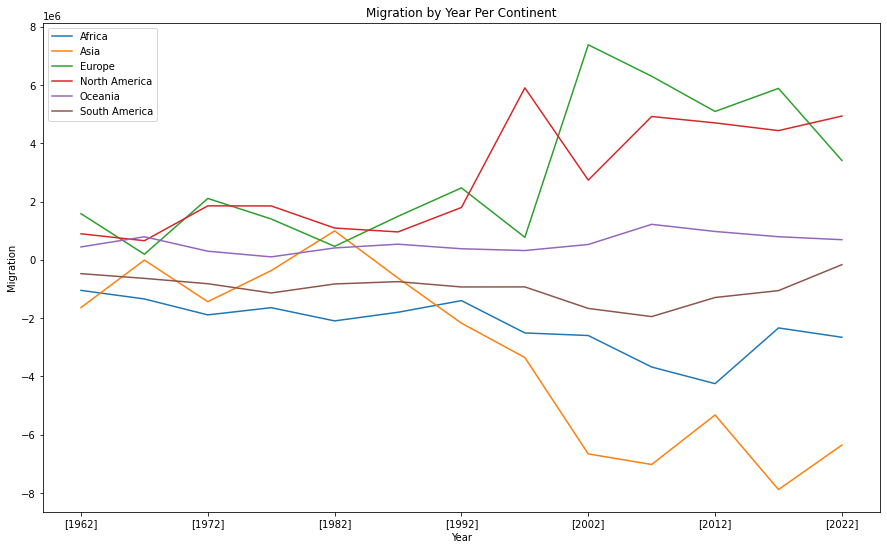

In [20]:
ContinentalGrowthAvgByYear.plot.line(xlabel = 'Year', ylabel = 'Migration', title = 'Migration by Year Per Continent')
plt.savefig('../Images/MigrationTrendsByContinent.jpg', bbox_inches='tight')

- This graph gives us a proper view of the net migration
- From the above graph we can get that from year 1962 to 2022 there has been a trend where there has been a lot of migration towards western countries from asia and africa continent. with a small migration from South America. 

In [21]:
## Here i am collecting the net migration for all the countries combined so as to train a global model.


Continents = pd.DataFrame(netMigration.iloc[:,0])
Migration = pd.DataFrame(netMigration.iloc[:,9::5])
continent_migration = Continents.join(Migration.astype('float64')).reset_index(drop = True).dropna( axis=0, 
                        how='any')
# Global = continent_migration.reset_index(drop = True)
Global = continent_migration.reset_index(drop = True)

In [22]:
Global

,Continent_Name,[1962],[1967],[1972],[1977],[1982],[1987],[1992],[1997],[2002],[2007],[2012],[2017],[2022]
0,Asia,-20000.0,-20000.0,-20000.0,-1153959.0,-3345095.0,-1525351.0,3076383.0,-867540.0,744193.0,-1046361.0,521769.0,-314602.0,-300000.0
1,Europe,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-443212.0,-179606.0,-176774.0,-217358.0,-136590.0,-69998.0,-69998.0
2,Africa,-282941.0,-121335.0,-253436.0,-224833.0,-81020.0,-93302.0,-128679.0,-164413.0,-205228.0,-357340.0,-143268.0,-50002.0,-50002.0
3,Africa,-296717.0,-587286.0,199800.0,199800.0,234148.0,188491.0,142812.0,199800.0,261100.0,357301.0,166267.0,32066.0,0.0
4,North America,-1880.0,-1202.0,-7018.0,-4428.0,-3763.0,-2890.0,2231.0,2469.0,252.0,1887.0,943.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,North America,10270.0,3245.0,9407.0,1961.0,-3492.0,-11156.0,-4618.0,-3936.0,-5272.0,-6267.0,-4501.0,-2254.0,-2254.0
189,Asia,-77646.0,-281841.0,-32255.0,-83697.0,-61453.0,-39345.0,35005.0,69998.0,-190001.0,-103670.0,-157065.0,-52816.0,-25000.0
190,Asia,-100000.0,-245662.0,-360993.0,-75000.0,-50000.0,-50000.0,607781.0,-100000.0,-112150.0,-65768.0,-75010.0,-150000.0,-150000.0
191,Africa,-35328.0,-22042.0,-20000.0,-25000.0,10000.0,-75000.0,-150000.0,20000.0,-150000.0,-175000.0,-50000.0,-40000.0,-40000.0


In [23]:
Global.iloc[:,1:13]

,[1962],[1967],[1972],[1977],[1982],[1987],[1992],[1997],[2002],[2007],[2012],[2017]
0,-20000.0,-20000.0,-20000.0,-1153959.0,-3345095.0,-1525351.0,3076383.0,-867540.0,744193.0,-1046361.0,521769.0,-314602.0
1,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-443212.0,-179606.0,-176774.0,-217358.0,-136590.0,-69998.0
2,-282941.0,-121335.0,-253436.0,-224833.0,-81020.0,-93302.0,-128679.0,-164413.0,-205228.0,-357340.0,-143268.0,-50002.0
3,-296717.0,-587286.0,199800.0,199800.0,234148.0,188491.0,142812.0,199800.0,261100.0,357301.0,166267.0,32066.0
4,-1880.0,-1202.0,-7018.0,-4428.0,-3763.0,-2890.0,2231.0,2469.0,252.0,1887.0,943.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
188,10270.0,3245.0,9407.0,1961.0,-3492.0,-11156.0,-4618.0,-3936.0,-5272.0,-6267.0,-4501.0,-2254.0
189,-77646.0,-281841.0,-32255.0,-83697.0,-61453.0,-39345.0,35005.0,69998.0,-190001.0,-103670.0,-157065.0,-52816.0
190,-100000.0,-245662.0,-360993.0,-75000.0,-50000.0,-50000.0,607781.0,-100000.0,-112150.0,-65768.0,-75010.0,-150000.0
191,-35328.0,-22042.0,-20000.0,-25000.0,10000.0,-75000.0,-150000.0,20000.0,-150000.0,-175000.0,-50000.0,-40000.0


In [24]:
Global.iloc[:,-1]

0     -300000.0
1      -69998.0
2      -50002.0
3           0.0
4           0.0
         ...   
188     -2254.0
189    -25000.0
190   -150000.0
191    -40000.0
192   -306540.0
Name: [2022], Length: 193, dtype: float64

In [25]:
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(Global.iloc[:,1:12], Global.iloc[:,-1], test_size=0.4,random_state=109) 

In [26]:
## Building a linear regression model

from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [27]:
y_pred

array([ 3.36119675e+04,  4.43463925e+04,  1.52635326e+05, -9.27058192e+05,
        2.36133071e+04, -2.70386677e+04,  4.58694163e+04,  1.87883221e+05,
        1.02888758e+06, -2.53580752e+05,  2.41229116e+04,  4.00267042e+05,
        3.04434866e+04,  6.94944381e+03,  1.48641690e+04,  6.23566568e+04,
       -1.20660520e+05,  5.21533551e+04,  2.10246738e+04,  4.44319378e+04,
        1.81935149e+04,  5.52819460e+04, -2.55307812e+05,  3.07296256e+04,
        1.44607453e+04,  2.66069659e+05,  1.50230021e+05,  3.49285648e+05,
       -1.98297039e+05,  2.24008624e+04,  9.22031299e+04, -8.42970614e+04,
        1.42738768e+05,  1.49553714e+04,  1.80618833e+04, -6.11493300e+04,
       -2.98684579e+05, -8.65444284e+04,  1.46290865e+05,  5.23653874e+03,
        1.29351665e+04, -8.85478732e+05, -4.60661714e+04,  3.23484139e+04,
       -3.16775526e+05,  3.48031532e+04,  3.51518084e+04, -1.31607883e+04,
       -3.58479435e+04,  4.69689592e+03,  1.18301108e+04, -7.95187478e+04,
        1.53394655e+04,  

In [28]:
## Calculating the mean squared error

from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred)

211486917146.48996

- Here i tried seperating the data for the net migration and tried to build a regression model over it. 
- In this model we tried to predict the migration rate for the year 2021 using the data of the previous year.
- But in this dataframe we just have 196 datapoints and 12 columns to train on. 
- The dimensionality of the data is very high and the number of data points is very low so as to obtain a good mean squared error. 
- The model was trained using a simple linear regression but gave a very bad result.
- Initially we assumed that all the columns must be related to each other and there must be a trend in the net migration over the years. But after the model buiding it was clear that our assumption was wrong. As there is not much relation between the net migration in each year column.
- Net migration rate depends on more complicated reasons such as development, climate, education, etc and cannot be modeled by using a regression model.